<a href="https://colab.research.google.com/github/jazaineam1/PYEF/blob/main/Cuadernos/4_medidas_de_forma_relaci%C3%B3n_bivariada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Medidas de posición (Percentiles), medidas de Forma y Análisis Bivariado**

## ***Universidad Central***
>## **Facultad de Ingeniería y Ciencias Básicas.**
![Imágen1](https://www.ucentral.edu.co/themes/ucentral/img/template/Universidad%20Central.png)


>## ***Probabilidad Y Estadística Fundamental***
>## ***Docente: Antonino Zainea Maya.***


## Percentiles

![](https://www.ordorite.com/wp-content/uploads/2017/03/80-of-customers.png)

Se llama cuantil o percentil p $con 0<p<100$ a aquel valor que divide a la variable en 2 partes, dejando a su izquierda el $p\%$
 de los datos y a $(100−p)\%$
 a su derecha.

Ilustraremos el anterior concepto con el conjunto de datos en el siguiente [enlace](https://raw.githubusercontent.com/jazaineam1/Script-B-sicos/master/Cuadernos%20r/Semana4/Jovenes%20desocupados.csv), la cual es una base tomada y depurada para nuestro trabajo de la página del [Dane](http://microdatos.dane.gov.co/index.php/catalog/518/datafile/F48) y que consta de información para jovenes desocupados en 2015.

Cargue la base de datos y encuentre el percentil 60 para la variable EP708S1 la cual se refiere a ¿Existe un nivel mínimo de ingreso mensual por debajo del cual no aceptaría un trabajo?

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# URL del archivo CSV
url = "https://raw.githubusercontent.com/jazaineam1/Script-B-sicos/master/Cuadernos%20r/Semana4/Jovenes%20desocupados.csv"

# Leer el archivo CSV directamente desde la URL
jovenes = pd.read_csv(url, sep=";")

jovenes


,EP735,EP698,EP700,EP702,EP722,EP708,EP708S1,EP709,EP710,EP711,EP712,EP713,EP714,EP715,EP716,DIRECTORIO_GEIH,HOGAR_GEIH,ORDEN_PERSONA_GEIH
0,7,2,1,6,1,1,644000,2,2,3,2,2,3,1,3,3748156,1,1
1,1,6,2,6,2,1,400000,2,1,2,1,2,10,1,3,3748165,1,3
2,5,2,1,3,2,1,635000,2,2,6,1,1,2,1,3,3748258,1,2
3,3,2,1,6,2,1,635000,2,2,200,100,1,3,1,3,3748260,1,2
4,6,2,1,3,2,1,644350,2,2,2,1,2,3,1,3,3748267,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2,3,2,6,1,1,800000,2,2,15,1,1,10,1,3,3769385,1,3
356,5,2,1,4,2,1,500000,2,2,3,3,1,3,1,3,3769395,1,2
357,5,2,1,6,1,1,900000,1,2,50,10,1,3,1,2,3769456,1,3
358,5,2,2,5,1,1,1200000,2,2,70,15,1,3,1,2,3769456,1,4


In [11]:
# Calcular el cuantil
cuantil = jovenes["EP708S1"].quantile(0.6)
print(cuantil)

644350.0


lo que indica que el 60%
 de los jóvenes desocupados encuestados no aceptarían un trabajo si su ¿ingreso mensual es de por lo menos $644350
.

**Ejercicio**
1. Indague sobre la base de datos y encuentre los percentiles 25,50 y 75 para la variable EP708S1 para los individuos encuestados que creen que la educación si es útil para conseguir trabajo variable EP715.

In [12]:
jovenessi = jovenes[jovenes['EP715'] == 1]

# Calcular los cuantiles deseados de la columna "EP708S1"
cuantiles = jovenessi['EP708S1'].quantile([0.25, 0.5, 0.75])
print(cuantiles)

0.25    600000.0
0.50    644350.0
0.75    650000.0
Name: EP708S1, dtype: float64


2. Indague sobre la base de datos y encuentre los percentiles 25,50 y 75 para la variable EP708S1 para los individuos encuestados que *NO* creen que la educación  es útil para conseguir trabajo variable EP715, ¿cúal es el análisis frente a las 2 ejercicios propuestos?

In [13]:
jovenessi = jovenes[jovenes['EP715'] == 2]

# Calcular los cuantiles deseados de la columna "EP708S1"
cuantiles = jovenessi['EP708S1'].quantile([0.25, 0.5, 0.75])
print(cuantiles)

0.25    500000.0
0.50    644000.0
0.75    650000.0
Name: EP708S1, dtype: float64


## Medidas de Forma

![](https://cdn0.iconfinder.com/data/icons/data-visualization-1/64/normal-distribution-curve-percentile-128.png)



**Simetría**

Una distribución es simétrica cuando los valores de la variable que son equidistantes a la media tienen la misma frecuencia.

Si una distribución no es simétrica, entonces es asimétrica, y la asimetría puede presentarse:

- a la derecha (**asimetría positiva**: cola de la distribución más larga a la derecha).
- a la izquierda (**asimetría negativa**: cola de la distribución más larga a la izquierda).

Uno de los coeficientes de simetría más utilizados es el llamado primer coeficiente de Fisher:

$$
g_1 = \frac{1}{n} \frac{\sum_{i=1}^{n}(x_i-\bar{x})^3}{S^3}, \text{con } S \text{ la desviación estándar}
$$

- Si $g_1 = 0$, la distribución de los datos es simétrica.
- Si $g_1 < 0$, la distribución de los datos es asimétrica negativa.
- Si $g_1 > 0$, la distribución de los datos es asimétrica positiva.

Gráficamente podemos distinguir la simetría o asimetría de un conjunto de datos como sigue:

![Gráfico de simetría y asimetría](https://bookdown.org/aquintela/EBE/Figure/simetria-pelo.png)

**Ejemplo**

Veremos si la variable \(EP708S1\) es simétrica usando la función `skew()`.


Para este ejemplo simularemos un conjunto de datos:

```python
asimetria = jovenes['EP708S1'].skew()
print("Coeficiente de asimetría:", asimetria)
```







In [14]:
asimetria = jovenes['EP708S1'].skew()
print("Coeficiente de asimetría:", asimetria)

Coeficiente de asimetría: 8.90517971958887


<Axes: xlabel='EP708S1', ylabel='Count'>

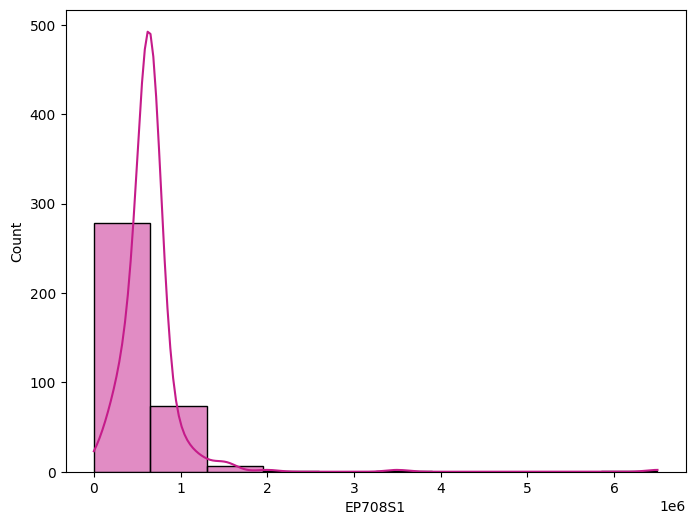

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(data=jovenes, x='EP708S1', bins=10, color='#c51b8a', kde=True)

el coeficiente de asimetría es 8.9 indicando que hay asimetría a la derecha lo cual se confirma con el histograma de la variable.



**Curtosis**

Indica la concentración de el conjunto de datos a la media (usualmente para distribuciones más o menos simétricas).

El coeficiente de curtosis más usado es el de Fisher y se calcula como:

$$
g_2 = \frac{1}{n}\frac{\sum_{i=1}^{n}(x_i-\bar{x})^4}{S^4}-3
$$

La curtosis se puede catalogar en:

- platicúrtica (la variable tiene poca concentración en su media).
- mesocúrtica (la variable tiene una concentración regular en su media).
- leptocúrtica (la variable es tiene una alta concentración en su media).

Gráficamente puede observarse de la siguiente manera:

![Gráfico de curtosis](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTgVNUX8uNnTcQcHODC-QE_fAxBHJHOBwGS1IVulUe2tbCp-aM&s)

**Ejemplo**

Para este ejemplo simularemos un conjunto de datos:

```python

# Crear un DataFrame con datos simulados (en este caso, una distribución Beta)
data = {'Simulados': np.random.beta(200, 200, 1000)}  # Simulación de datos Beta
df = pd.DataFrame(data)

# Calcular el coeficiente de curtosis (kurtosis)
curtosis = df['Simulados'].kurtosis()
print("Coeficiente de curtosis:", curtosis)

```

Este código simula un conjunto de datos y calcula la curtosis de los datos simulados.

In [16]:
# Crear un DataFrame con datos simulados (en este caso, una distribución Beta)
data = {'Simulados': np.random.beta(200, 200, 1000)}  # Simulación de datos Beta
df = pd.DataFrame(data)

# Calcular el coeficiente de curtosis (kurtosis)
curtosis = df['Simulados'].kurtosis()
print("Coeficiente de curtosis:", curtosis)


Coeficiente de curtosis: -0.07474220229402029


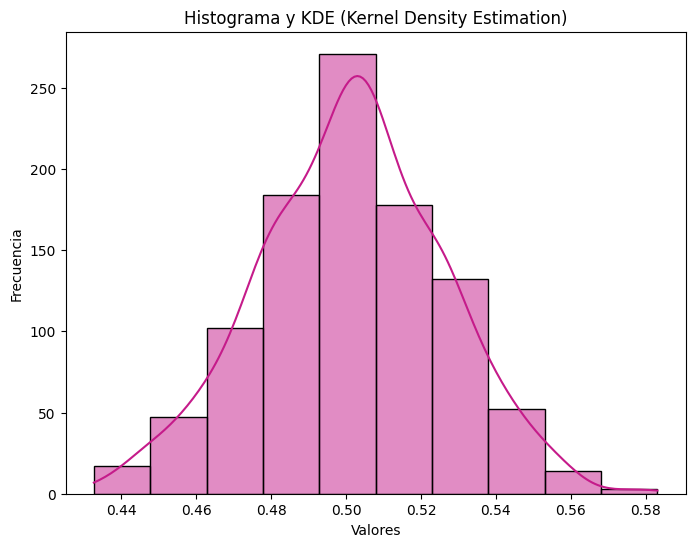

In [17]:
# Crear un histograma con Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Simulados', bins=10, color='#c51b8a', kde=True)
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma y KDE (Kernel Density Estimation)')
plt.show()

# Análisis bivariado

![](https://cdn0.iconfinder.com/data/icons/data-analytics-orchid-vol-2/256/Regression_Analysis-128.png)

Si bien, el análisis univariado nos da una amplia visión para entender el comportamiento de la variable, en ocasiones es necesario evaluar la relación de un conjunto de variables.

Para desarrollar este análisis para cada una de las unidades observacionales se toma la medición de 2 variables. El análisis bivariado establece el tipo de relación empírica (si la hay), es decir además de describir, cuantifica el nivel de relación entre 2 variables. Dependiendo del tipo de variables observadas la forma de relación es diferente, las relaciones entre tipos de variables son:

* Cuantitativa – Cuantitativa
* Cuantitativa – Cualitativa
* Cualitativa - Cualitativa

Claro, aquí está el texto formateado correctamente:

## Dos Variables cuantitativas

Para realizar este análisis sobre las variables, veremos:

1. Gráfico (Diagrama de dispersión)

2. Correlacional (Coeficiente de correlación)

3. Regresión (Ecuación de regresión)

Lo anterior permite conocer si hay relación entre las variables.

### Diagrama de dispersión:

Es necesario reconocer cuál de las 2 variables "depende" de la otra, para nuestro análisis la notación será, X: variable independiente y Y: variable dependiente, esto con el fin de que podamos identificar cuál variable irá en la abscisas (eje x) y cuál en las ordenadas (Y) dentro de un plano cartesiano.

En este caso, el punto en el plano indica las mediciones de un individuo en las coordenadas x=2 y y=4, cada punto representará entonces a un individuo.

<div align="center">
<img src="https://raw.githubusercontent.com/jazaineam1/Script-B-sicos/master/Cuadernos%20r/Semana5/Imagen1.png" width="300">
</div>

En el diagrama de dispersión se pueden observar los siguientes comportamientos.

**Relación directa**

![](https://github.com/jazaineam1/Script-B-sicos/blob/master/Cuadernos%20r/Semana5/dire.png?raw=true)

**Relación inversa**

![](https://github.com/jazaineam1/Script-B-sicos/blob/master/Cuadernos%20r/Semana5/inv.png?raw=true)

**No hay relación**

![](https://github.com/jazaineam1/Script-B-sicos/blob/master/Cuadernos%20r/Semana5/no.png?raw=true)

### Coeficiente de correlación de Pearson $r$

El coeficiente de correlación es un estadístico que muestra el tipo de relación entre las dos variables y además mide la fuerza de asociación lineal, este se define como:

$$r=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{(n-1)S_xS_y}$$

El coeficiente de correlación toma valores entre -1 y 1 y dependiendo de su valor se puede establecer la fuerza de relación.

El análisis de este coeficiente se presenta a continuación:

<div align="center">
<img src="https://raw.githubusercontent.com/jazaineam1/Script-B-sicos/master/Cuadernos%20r/Semana5/coef.png" width="300">
</div>

### Regresión

Básicamente, hablamos de regresión o ajuste lineales al método estadístico matemático que permite definir una ecuación para la relación entre una variable dependiente $Y$ y la variable independiente.

$$ \hat{y}=\hat{\beta_0}+\hat{\beta_1}\times x$$

A esta forma se le conoce como ecuación de estimación o recta de regresión, la cual se encuentra minimizando la distancia de la recta con las observaciones.

<div align="center">
<img src="https://raw.githubusercontent.com/jazaineam1/Script-B-sicos/master/Cuadernos%20r/Semana5/regre.png" width="300">
</div>

Para la ecuación mostrada anteriormente tenemos que:

$\hat{y}$: es la estimación de la variable dependiente.

$\hat{\beta_0}$: Punto de corte de la recta estimada.

$\hat{\beta_1}$: Pendiente de la recta estimada
$x$: la variable independiente

Con $\hat{\beta_1}=r\frac{s_x}{s_y}$ y $\hat{\beta_0}=\bar{y} -\hat{\beta_1}\bar{x}$ y $r$ el coeficiente de correlación, $S_x$ la desviación estándar de $x$, $S_y$ la desviación estándar de $y$, $\bar{y}$ el promedio de $y$ y $\bar{x}$ el promedio de $x$.

### ¿Qué tan buena es la regresión?

Una medida de bondad de ajuste es el coeficiente de determinación usualmente llamado $R^2$

$$0≤R^2≤1$$

Entre más cerca este a 1 mejor ajuste se tiene, la interpretación de este valor es la cantidad de la varianza total explicada por el modelo, usualmente en forma porcentual.

$$R^2=r^2
$$
Donde $r$ es el coeficiente de correlación de Pearson.

#### Ejemplo



 Usaremos un conjunto de datos  construido por nosotros en donde relacionaremos el PIB y la inversión en educación.

```python
# Paso 1: Análisis descriptivo con un gráfico de dispersión
# Importar bibliotecas

import statsmodels.api as sm

# Crear un DataFrame con datos de ejemplo (PIB e inversión en educación de varios países)
data = pd.DataFrame({
    "País": ["País A", "País B", "País C", "País D", "País E", "País F", "País G", "País H", "País I", "País J"],
    "PIB (en miles de millones de dólares)": [200, 350, 450, 600, 800, 950, 1100, 1250, 1400, 1550],
    "Inversión en Educación (en millones de dólares)": [20, 30, 50, 70, 90, 110, 120, 140, 160, 180]
})

display(data)
# Paso 1: Gráfico de dispersión para el análisis descriptivo
sns.scatterplot(x="PIB (en miles de millones de dólares)", y="Inversión en Educación (en millones de dólares)", data=data)
plt.title("Gráfico de Dispersión de PIB vs. Inversión en Educación por País")
plt.xlabel("PIB")
plt.ylabel("Inversión en Educación")
plt.grid(True)
```

,País,PIB,Inversion_Educacion
0,País A,200,20
1,País B,350,30
2,País C,450,50
3,País D,600,70
4,País E,800,90
5,País F,950,110
6,País G,1100,120
7,País H,1250,140
8,País I,1400,160
9,País J,1550,180


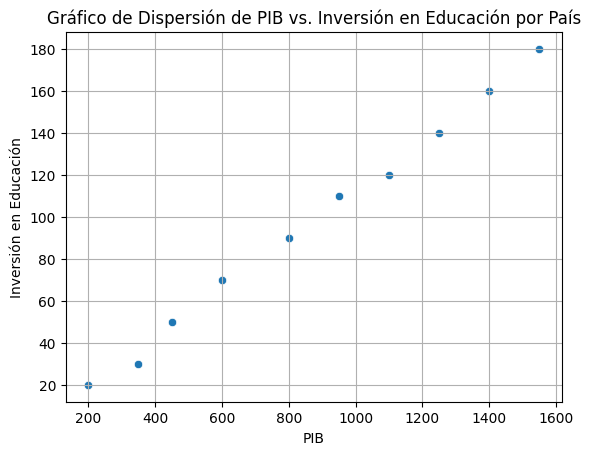

In [18]:

import statsmodels.api as sm

# Crear un DataFrame con datos de ejemplo (PIB e inversión en educación de varios países)
data = pd.DataFrame({
    "País": ["País A", "País B", "País C", "País D", "País E", "País F", "País G", "País H", "País I", "País J"],
    "PIB": [200, 350, 450, 600, 800, 950, 1100, 1250, 1400, 1550],
    "Inversion_Educacion": [20, 30, 50, 70, 90, 110, 120, 140, 160, 180]
})

display(data)
# Paso 1: Gráfico de dispersión para el análisis descriptivo
sns.scatterplot(x="PIB", y="Inversion_Educacion", data=data)
plt.title("Gráfico de Dispersión de PIB vs. Inversión en Educación por País")
plt.xlabel("PIB")
plt.ylabel("Inversión en Educación")
plt.grid(True)

Paso 2: Cálculo e Interpretación del Coeficiente de Correlación

Ahora, calcularemos el coeficiente de correlación para medir la relación lineal entre el PIB y la inversión en educación:

In [19]:
# Calcular el coeficiente de correlación de Pearson usando pandas
correlation = data["PIB"].corr(data["Inversion_Educacion"])

print(f"Coeficiente de Correlación de Pearson: {correlation}")


Coeficiente de Correlación de Pearson: 0.998033297936822


El coeficiente de correlación de Pearson mide la fuerza y la dirección de la relación lineal entre dos variables. Un valor cercano a 1 indica una correlación positiva fuerte, mientras que un valor cercano a -1 indica una correlación negativa fuerte. Un valor cercano a 0 sugiere una correlación débil.



paso 3: Cálculo de la Recta de Regresión y Predicción

Vamos a calcular la recta de regresión para predecir la inversión en educación basada en el PIB. Utilizaremos la biblioteca `numpy` para realizar este cálculo:


In [20]:

# Paso 3: Análisis de Regresión Lineal con statsmodels
X = data["PIB"]
y = data["Inversion_Educacion"]

# Agregar una constante a la matriz X para calcular el intercepto
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Imprimir un resumen del modelo
print(model.params)


const   -5.007161
PIB      0.117927
dtype: float64


In [21]:

# Realizar una predicción interesante
pib_to_predict = 1700  # PIB de un país para predecir la inversión en educación
predicted_investment = model.predict([1, pib_to_predict])
print(f"Inversión en Educación predicha para un PIB de {pib_to_predict} millones de dólares: ${predicted_investment[0]:.2f} millones")


Inversión en Educación predicha para un PIB de 1700 millones de dólares: $195.47 millones


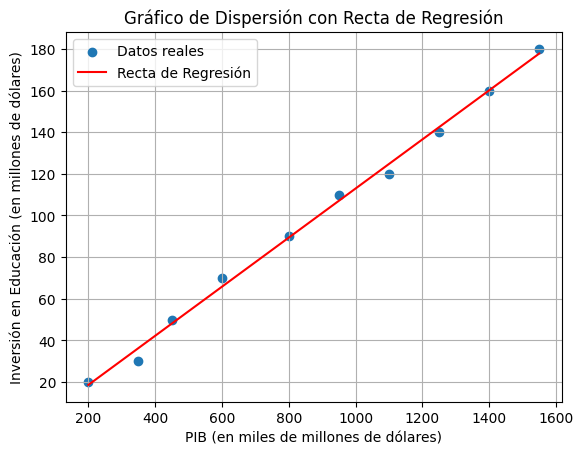

In [22]:
# Mostrar el gráfico con la recta de regresión ajustada
plt.scatter(data["PIB"], data["Inversion_Educacion"], label="Datos reales")
plt.plot(data["PIB"], model.predict(X), color='red', label="Recta de Regresión")
plt.title("Gráfico de Dispersión con Recta de Regresión")
plt.xlabel("PIB (en miles de millones de dólares)")
plt.ylabel("Inversión en Educación (en millones de dólares)")
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

## Una variable cuantitativa y otra cualitativa
En este caso el análisis necesario es un comparativo entre cada una de las categorías de la variable cualitativa frente a su variable cuantitativa, es posible verlo como un análisis univariado para cada nivel de la variable cualitativa. Un ejemplo de esto puede ser, salarios entre hombre y mujeres, de cada individuo se observa el sexo (cualitativa) y salario (cuantitativa) si se establece una diferencia de salarios entre las categorías de sexo podemos establecer que hay relación entre el sexo y los ingresos.

### Análisis Gráfica
Diagrama de cajas múltiple Establece una comparativa entre centro, variabilidad y datos atípicos de un conjunto de datos.

usaremos la base de datos de [estudiantes](https://raw.githubusercontent.com/jazaineam1/Script-B-sicos/master/Cuadernos%20r/Semana3/estudiantes.csv) y haremos el diagrama de cajas múltiple para la variable Peso entre hombres y mujeres.

Ejemplo

In [23]:
url = "https://raw.githubusercontent.com/jazaineam1/Script-B-sicos/master/Cuadernos%20r/Semana3/estudiantes.csv"
estudiantes = pd.read_csv(url,sep=';')
estudiantes

,edad,altura,peso,sexo
0,19,165,65,Femenino
1,20,167,58,Femenino
2,24,161,62,Femenino
3,21,169,60,Femenino
4,22,171,70,Masculino
5,21,173,68,Masculino
6,23,166,58,Femenino
7,18,166,58,Femenino
8,19,162,54,Femenino
9,18,170,73,Masculino


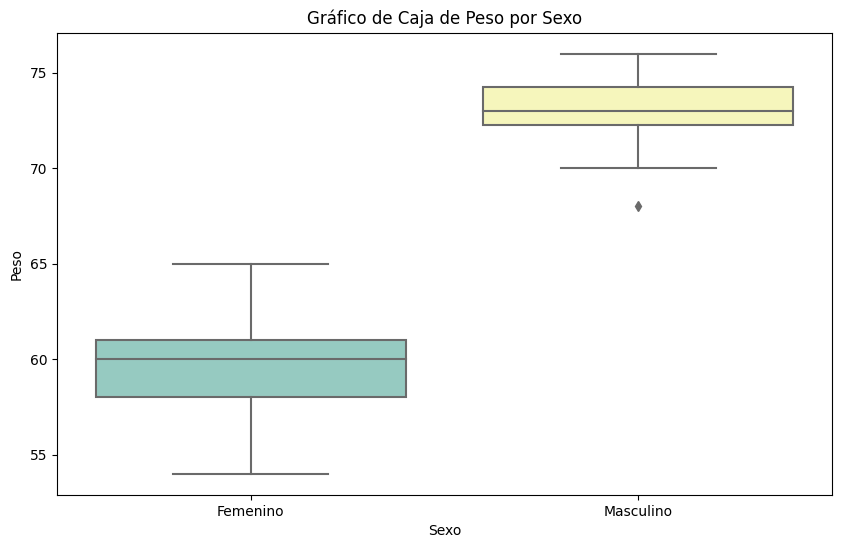

In [24]:
# Crear un gráfico de caja con Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='sexo', y='peso', data=estudiantes, palette='Set3')
plt.title('Gráfico de Caja de Peso por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Peso')
plt.show()

el gráfico muestra que el comportamiento general del peso en hombre es mayor al de las mujeres.

Otra forma es realizar el cálculo de las medidas resumen como $ \bar{X}$
, $S^2$ y $S$ para cada categoría y realizar la comparación entre ellas, para esto usaremos la función agg en pandas

In [25]:
estadisticas_por_sexo = estudiantes.groupby('sexo')['peso'].agg(['mean', 'var', 'std'])
estadisticas_por_sexo

,mean,var,std
sexo,,,
Femenino,59.666667,7.151515,2.674232
Masculino,72.750000,6.785714,2.604940


## Dos variables cualitativas
Para este caso se toman 2 variables cualitativas de cada individuo, muy parecido a lo que se realiza en el análisis univariado, en este caso se trabaja sobre las frecuencias de las combinaciones de categorías de las variables observadas.

### Tabla de contingencia
Una tabla de contingencia bidimensional es una clasificación de observaciones muestrales según dos características cualitativas, cada una con un número determinado de resultados posibles. Una de las características determina las filas de la tabla y la otra las columnas.

### Ejemplo
Usaremos la base de datos jovenes y realizaremos la tabla de contingencia para las variables EP722 y EP709, las cuales corresponden respectivamente a las preguntas, ¿Alguna vez rechazó un trabajo que le ofrecieron? y en los últimos doce meses, ¿ha recibido Asesoramiento, ayuda o asistencia de los servicios de empleo?

In [26]:
import pandas as pd

# Cargar el DataFrame desde el enlace CSV con separador de punto y coma
url = "https://raw.githubusercontent.com/jazaineam1/Script-B-sicos/master/Cuadernos%20r/Semana4/Jovenes%20desocupados.csv"
jovenes = pd.read_csv(url, sep=";")

# Realizar la tabulación cruzada
tabulacion_cruzada = pd.crosstab(jovenes['EP722'], jovenes['EP709'])

tabulacion_cruzada


EP709,1,2
EP722,,
1,16,104
2,30,210


las filas indican los niveles de la variable EP722 y las columnas toman los valores para EP709, es decir recordando que 1 indica si y 2 no, la primera entrada de la matriz que 16 personas si han rechazado un trabajo que le ofrecieron y además recibieron asesoramiento de los servicios de empleo.

la tabla de contingencia puede graficarse en un diagrama de barras múltiple

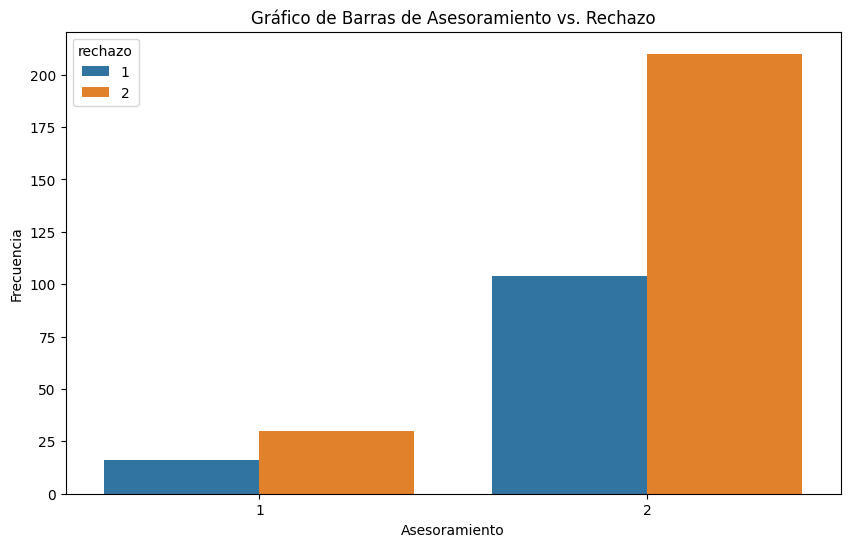

In [27]:
# Crear un DataFrame con las columnas de interés
rechazo = pd.Categorical(jovenes['EP722'])
asesoramiento = pd.Categorical(jovenes['EP709'])
fig_data = pd.DataFrame({'asesoramiento': asesoramiento, 'rechazo': rechazo})

# Realizar el conteo de las combinaciones de valores
fig_data = fig_data.groupby(['asesoramiento', 'rechazo']).size().reset_index(name='n')

# Crear un gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='asesoramiento', y='n', hue='rechazo', data=fig_data)
plt.title('Gráfico de Barras de Asesoramiento vs. Rechazo')
plt.xlabel('Asesoramiento')
plt.ylabel('Frecuencia')
plt.show()

## Ejercicio
Usando la base de datos que se encuentra en [click aquí](https://antonino.shinyapps.io/Datos/) realizar:

1. Análisis descriptivo y gráfico entre las variables Ingresos y Gastos.
* Determine que tipo de relación hay entre las 2 variables.
* Realice el diagrama de dispersión de las 2 variables.
* Encuentre el coeficiente de correlación y la recta ajustada.
* Dibuje el diagrama de dispersión con la recta ajustada.
2. Análisis descriptivo y gráfico entre las variables Ingresos y Sexo.

* Encuentre la media y mediana, con esto evalué si hay diferencia de ingresos en los sexos.
* Encuentre la varianza y desviación estándar de cada sexo e indique en cual de los 2 hay mayor dispersión.
* Realice el diagrama de cajas múltiple y realice un análisis teniendo en cuenta la información anterior.
* Análisis descriptivo y gráfico entre las variables Cargo y Sexo.
* Realice la tabla de contingencia de las 2 variables.
* Realice el gráfico de barras comparativas.
* Analice si hay relación o no entre las variables según el gráfico anterior.